In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os
import json
import spacy
import nltk
import emoji
import re
from PIL import Image
from collections import defaultdict
from utils import  filter_date,join_path,create_df

In [2]:
path= join_path('..','Data','EmpresaElectricaDeLaHabana')
primer = 2022
df = create_df(primer,path)
df_2022 = filter_date(df,'2022-01-01','2022-12-31','date')
df_2022.head()
   

,text,sender_id,date,bot,views,message_id,is_reply,reply_to,reactions,total_reactions,photo_path
0,⚡️👷La principal causa de #interrupción eléctri...,-1001392909520,2022-11-30 22:52:06+00:00,NaN,8250,5493,False,NaN,"{'👍': 10, '🤬': 5}",15,NaN
1,"📌 Estimados clientes del municipio Playa,el co...",-1001392909520,2022-11-30 22:43:45+00:00,NaN,7803,5492,False,NaN,"{'🤬': 18, '👍': 4}",22,NaN
2,📌Disparo automático por frecuencia(DAF). Un di...,-1001392909520,2022-11-30 22:00:28+00:00,NaN,8062,5491,False,NaN,{'👍': 11},11,NaN
3,"📌 Estimados clientes ,el municipio San Miguel ...",-1001392909520,2022-11-30 21:58:51+00:00,NaN,7808,5490,False,NaN,{'👍': 9},9,NaN
4,"📌Estimados clientes del municipio Lisa,los con...",-1001392909520,2022-11-30 21:41:28+00:00,NaN,7983,5489,False,NaN,"{'👍': 9, '🤬': 5}",14,NaN


(array([3.663e+03, 1.195e+03, 3.220e+02, 7.000e+01, 2.200e+01, 3.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([   994. ,  16486.1,  31978.2,  47470.3,  62962.4,  78454.5,
         93946.6, 109438.7, 124930.8, 140422.9, 155915. ]),
 <BarContainer object of 10 artists>)

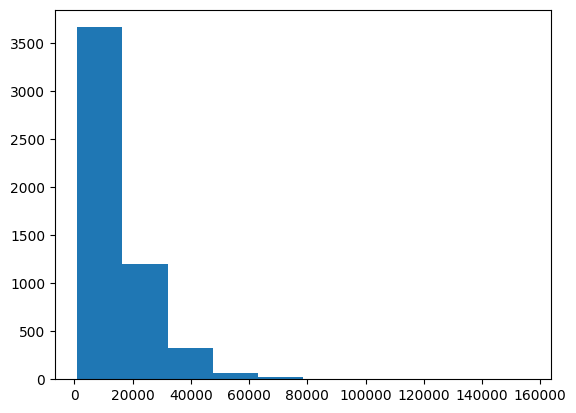

In [3]:
plt.hist(df_2022['views'])

In [4]:
df_2022.shape

(5280, 11)

In [5]:
df.isnull().sum()

text                   0
sender_id              0
date                   0
bot                40239
views                  0
message_id             0
is_reply               0
reply_to           40116
reactions              0
total_reactions        0
photo_path         34298
dtype: int64

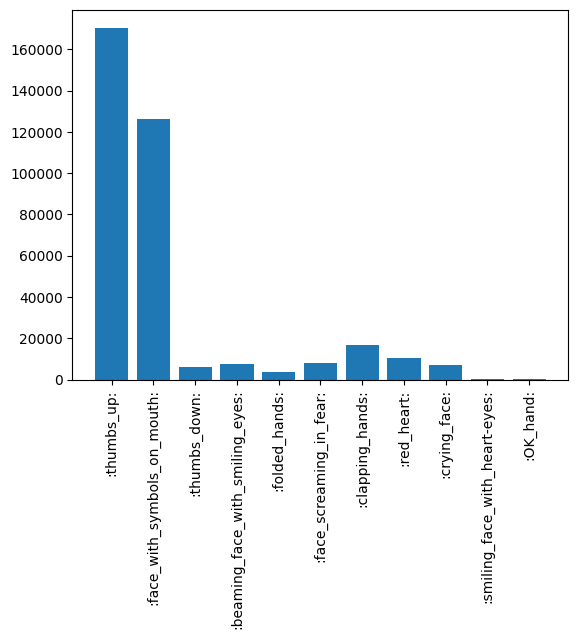

In [6]:
dic = defaultdict(int)
for i in df_2022['reactions']:
    for k,v in i.items():
        dic[emoji.demojize(k)]+=v

plt.bar(dic.keys(),dic.values())
plt.xticks(rotation=90)
plt.show()

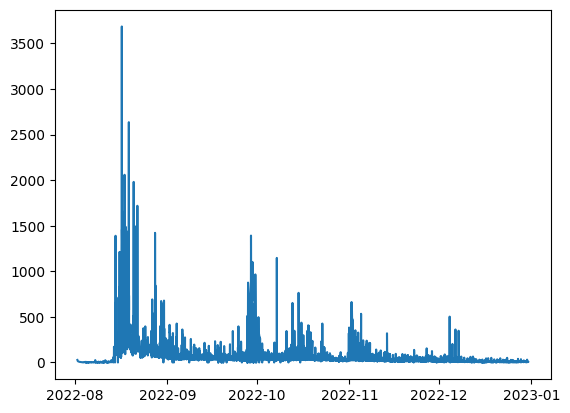

In [7]:
#fig = plt.figure(figsize=(20,10))
plt.plot(df_2022['date'],df_2022['total_reactions'])
#plt.xticks(rotation=45)
